# Shapley Tests

## Setup

### Imports

In [1]:
# Type imports
from typing import Any, Dict, Tuple, List

# Standard Libraries
from enum import Enum, auto
from pathlib import Path
from math import sqrt, pi, sin, cos, tan, radians
from statistics import mean
from itertools import zip_longest
from dataclasses import dataclass, field, asdict

# Shared Packages
import numpy as np
import pandas as pd
import xlwings as xw
import matplotlib.pyplot as plt
#import PySimpleGUI as sg
import pydicom
import shapely
from shapely.plotting import plot_polygon, plot_points

# Local functions and classes
from types_and_classes import *


### Global Settings

In [2]:
PRECISION = 3


In [3]:
%matplotlib inline

### Testing the StructureSlice Class

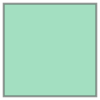

In [4]:
box6 = shapely.Polygon(box_points(6))
a = StructureSlice([box6])
a.contour

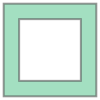

In [5]:
box6 = shapely.Polygon(box_points(6))
box4 = shapely.Polygon(box_points(4))
a = StructureSlice([box6, box4])
a.contour

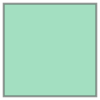

In [6]:
a.exterior

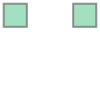

In [7]:
# 2 2x2 boxes
box2a = shapely.Polygon(box_points(2, offset_x=-3))
box2b = shapely.Polygon(box_points(2, offset_x=3))
a = StructureSlice([box2a, box2b])
a.contour

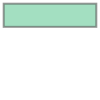

In [8]:
a.hull

In [9]:
### Simple overlap
box6 = shapely.Polygon(box_points(6))
offset_box6 = shapely.Polygon(box_points(6,offset_x=3))
try:
    StructureSlice([box6, offset_box6])
except ValueError as err:
    print(err)

Cannot merge overlapping contours.


In [10]:
# Inverted order
box6 = shapely.Polygon(box_points(6))
box4 = shapely.Polygon(box_points(4))
try:
    StructureSlice([box4, box6])
except ValueError as err:
    print(err)

Cannot merge overlapping contours.


## Relationship Functions

### Testing compare function

In [11]:
box6 = shapely.MultiPolygon([shapely.Polygon(box_points(6))])
box4 = shapely.MultiPolygon([shapely.Polygon(box_points(4))])
compare(box6, box4)

'111001001'

In [12]:
box6 = shapely.MultiPolygon([shapely.Polygon(box_points(6))])
compare(box6, box6)

'100010001'

In [13]:
# 2 2x2 boxes
box2a = shapely.Polygon(box_points(2, offset_x=-3))
box2b = shapely.Polygon(box_points(2, offset_x=3))
compare(box2a, box2b)

'001001111'

In [14]:
# compare with empty contour
box6 = shapely.MultiPolygon([shapely.Polygon(box_points(6))])
mt = shapely.MultiPolygon()
compare(box6, mt)

'001001001'

In [15]:
# compare with empty contour
box6 = shapely.MultiPolygon([shapely.Polygon(box_points(6))])
mt = shapely.MultiPolygon()
compare(mt, box6)

'000000111'

### Testing relate function

In [16]:
box6 = shapely.Polygon(box_points(6))
box4 = shapely.Polygon(box_points(4))
a = StructureSlice([box6])
b = StructureSlice([box4])
bin(relate(a,b))

'0b111001001111001001111001001'

In [17]:
box6 = shapely.Polygon(box_points(6))
a = StructureSlice([box6])
bin(relate(a,a))

'0b100010001100010001100010001'

In [18]:
# 2 2x2 boxes
box2a = shapely.Polygon(box_points(2, offset_x=-3))
box2b = shapely.Polygon(box_points(2, offset_x=3))
a = StructureSlice([box2a])
b = StructureSlice([box2b])
bin(relate(a,b))

'0b1001111001001111001001111'

## Named Relationship Identification

### Testing RelationshipType

In [19]:
bool(RelationshipType.UNKNOWN)

False

In [20]:
bool(RelationshipType.LOGICAL)

True

# Relationship Types and Definitions

### Color Coding
<table style="border: 2px solid black; width=50px;"><tr><td>
<ul style="font-weight: 900; font-size: 20px;">
<li style="color: blue;">region a</li>
<li style="color: green;">region b</li>
<li style="color: orange;">intersection of a & b</li></ul>
</tr></td></>

## Disjoint Relations


<link rel="stylesheet" href="relations.css">
<table width="400px">
<tr class="l"><th>Surrounds</th><th>Transitive</t></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> have no interior points in common, and with holes filled <span class="b">b</span> lies in the interior of <span class="a">a</span>.
</td></tr><tr><td>
<img src="Images/Relationships/surrounds simple.png" alt="surrounds simple">
<img src="Images/Relationships/surrounds with ring.png" alt="surrounds ring">
</td><td>
<table class="f">
<tr><th/><th>Hull</th><th>Exterior</th><th>Region</th></tr>
<tr><th>Matrix</th>
<td class="na">N/A</td>
<td><table class="matrix">        
    <tr><td>2</td><td>*</td><td>*</td></tr>
    <tr><td>*</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    </table>
    </td>
<td><table class="matrix">        
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
</tr><tr class="bin">
<th>Mask</th><td><span>000000000</span></td><td><span>100010110</span></td><td><span>110110000</span></td></tr>
<tr class="bin">
<th>Value</th><td><span>000000000</span></td><td><span>100000000</span></td><td><span>000000000</span></td></tr>
</table></td></tr></table>


In [21]:
surrounds_def = RelationshipTest(RelationshipType.SURROUNDS,
                                 0b000000000100010110110110000,
                                 0b000000000100000000000000000)

def surrounds_example1():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle2 = shapely.Polygon(circle_points(1))

    a = StructureSlice([circle6, circle4])
    b = StructureSlice([circle2])
    return a, b

def surrounds_example2():
    circle6 = shapely.Polygon(circle_points(3))
    circle5 = shapely.Polygon(circle_points(2.5))
    circle4 = shapely.Polygon(circle_points(2))
    circle3 = shapely.Polygon(circle_points(1.5))
    circle2 = shapely.Polygon(circle_points(1))

    a = StructureSlice([circle6, circle5, circle2])
    b = StructureSlice([circle4, circle3])
    return a, b

Surounds Mask  000000000  |  100010110  |  110110000 
Surounds Value  000000000  |  100000000  |  000000000 
Relation Binary  111001001  |  111001001  |  001001111 
Relationship RelationshipType.SURROUNDS


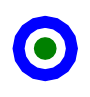

In [22]:
print('Surounds Mask', bin_format(surrounds_def.mask))
print('Surounds Value', bin_format(surrounds_def.value))

a, b = surrounds_example1()
relation_example(a, b, surrounds_def)


Relation Binary  111001001  |  111001001  |  001001111 
Relationship RelationshipType.SURROUNDS


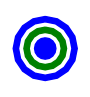

In [23]:
a, b = surrounds_example2()
relation_example(a, b, surrounds_def)

<link rel="stylesheet" href="relations.css">
<table width="400px">
<tr class="l"><th>Shelters</th><th>Transitive</th></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> 
have no points in common, 
but the Convex Hull of <span class="a">a</span> contains <span class="b">b</span>.
</td></tr>
<tr><td>
<img src="Images/Relationships/shelters.png" alt="Shelters">
</td><td>
<table class="f">
<tr><th/><th>Hull</th><th>Exterior</th><th>Region</th></tr>
<tr><th>Matrix</th>
<td><table class="matrix">        
    <tr><td>2</td><td>1</td><td>2</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    <tr><td>F</td><td>*</td><td>*</td></tr>
    </table>
    </td>
<td><table class="matrix">        
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
<td><table class="matrix">        
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
</tr>
</tr><tr class="bin">
<th>Mask</th><td><span>111000100</span></td><td><span>110110000</span></td><td><span>110110000</span></td></tr>
<tr class="bin">
<th>Value</th><td><span>111000000</span></td><td><span>000000000</span></td><td><span>000000000</span></td></tr>
</table></td></tr></table>

In [24]:
shelters_def = RelationshipTest(RelationshipType.SHELTERS, 
                                0b111000100110110000110110000, 
                                0b111000000000000000000000000)

def shelters_examplee():
    circle6 = shapely.Polygon(circle_points(3))
    circle5 = shapely.Polygon(circle_points(2.5))
    circle4_offset = shapely.Polygon(circle_points(2, offset_x=3.5))
    shell = shapely.difference(circle6, circle5)
    cove = shapely.difference(shell, circle4_offset)
    circle2 = shapely.Polygon(circle_points(1, offset_x=1))

    a = StructureSlice([cove])
    b = StructureSlice([circle2])
    return a, b


Shelters Mask  111000100  |  110110000  |  110110000 
Shelters Value  111000000  |  000000000  |  000000000 
Relation Binary  111001001  |  001001111  |  001001111 
Relationship RelationshipType.SHELTERS


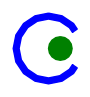

In [25]:
print('Shelters Mask', bin_format(shelters_def.mask))
print('Shelters Value', bin_format(shelters_def.value))

a, b = shelters_examplee()
relation_example(a, b, shelters_def)

<link rel="stylesheet" href="relations.css">
<table width="600px">
<tr class="l"><th>Disjoint</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The Convex Hull of 
<span class="a">a</span> has no points in common wuth <span class="b">b</span>.</td></tr>
<tr><td>
<img src="Images/Relationships/disjoint.png" alt="Disjoint" style="width: 640px">
</td><td>
<table class="f">
<tr><th/><th>Hull</th><th>Exterior</th><th>Region</th></tr>
<tr><th>Matrix</th>
<td><table class="matrix">        
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
<td><table class="matrix">        
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
<td><table class="matrix">        
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
</tr>
</tr><tr class="bin">
<th>Mask</th><td><span>110110000</span></td><td><span>110110000</span></td><td><span>110110000</span></td></tr>
<tr class="bin">
<th>Value</th><td><span>000000000</span></td><td><span>000000000</span></td><td><span>000000000</span></td></tr>
</table></td></tr></table>

In [26]:
disjoint_def = RelationshipTest(RelationshipType.DISJOINT, 
                                0b110110000110110000110110000, 
                                0b000000000000000000000000000)

def disjoint_examplee():
    circle4_left = shapely.Polygon(circle_points(4, offset_x=-4.5))
    circle4_right = shapely.Polygon(circle_points(4, offset_x=4.5))

    a = StructureSlice([circle4_left])
    b = StructureSlice([circle4_right])
    return a, b


Disjoint Mask  110110000  |  110110000  |  110110000 
Disjoint Value  000000000  |  000000000  |  000000000 
Relation Binary  001001111  |  001001111  |  001001111 
Relationship RelationshipType.DISJOINT


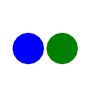

In [27]:
print('Disjoint Mask', bin_format(disjoint_def.mask))
print('Disjoint Value', bin_format(disjoint_def.value))

a, b = disjoint_examplee()
relation_example(a, b, disjoint_def)

<link rel="stylesheet" href="relations.css">
<table width="400px">
<tr class="l"><th>Borders</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The exterior boundaries of 
<span class="a">a</span> and <span class="b">b</span> 
have more than one point in common, but their interiors do not intersect.
</td></tr>
<tr><td>
<img src="Images/Relationships/borders.png" alt="Borders">
</td><td>
<table class="f">
<tr><th/><th>Hull</th><th>Exterior</th><th>Region</th></tr>
<tr><th>Matrix</th>
<td class="na">N/A</td>
<td><table class="matrix">        
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>1</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
<td><table class="matrix">        
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>1</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
</tr>
</tr><tr class="bin">
<th>Mask</th><td><span>000000000</span></td><td><span>110110000</span></td><td><span>110110000</span></td></tr>
<tr class="bin">
<th>Value</th><td><span>000000000</span></td><td><span>000010000</span></td><td><span>000010000</span></td></tr>
</table></td></tr></table>

In [28]:
borders_def = RelationshipTest(RelationshipType.BORDERS, 
                               0b000000000110110000110110000, 
                               0b000000000000010000000010000)

def borders_example():
    box4_left = shapely.Polygon(box_points(4, offset_x=-2))
    box4_right = shapely.Polygon(box_points(4, offset_x=2))

    a = StructureSlice([box4_left])
    b = StructureSlice([box4_right])
    return a, b


Borders Mask  000000000  |  110110000  |  110110000 
Borders Value  000000000  |  000010000  |  000010000 
Relation Binary  001011111  |  001011111  |  001011111 
Relationship RelationshipType.BORDERS


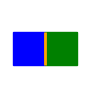

In [29]:
print('Borders Mask', bin_format(borders_def.mask))
print('Borders Value', bin_format(borders_def.value))

a, b = borders_example()
relation_example(a, b, borders_def)

<link rel="stylesheet" href="relations.css">
<table width="400px">
<tr class="l"><th>Confines</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The interior boundary of <span class="a">a</span> 
and the exterior boundary of <span class="b">b</span> 
have more than one point in common, but their interiors do not intersect.
</td></tr>
<tr><td>
<img src="Images/Relationships/confines.png" alt="Confines">
<img src="Images/Relationships/confines with island.png" alt="Confines With Island">
</td><td>
<table class="f">
<tr><th/><th>Hull</th><th>Exterior</th><th>Region</th></tr>
<tr><th>Matrix</th>
<td><table class="matrix">        
    <tr><td>*</td><td>*</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
<td><table class="matrix">        
    <tr><td>2</td><td>*</td><td>2</td></tr>
    <tr><td>*</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>F</td><td>*</td></tr>
    </table>
    </td>
<td><table class="matrix">        
    <tr><td>F</td><td>F</td><td>*</td></tr>
    <tr><td>F</td><td>1</td><td>*</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    </table>
    </td>
</tr>
</tr><tr class="bin">
<th>Mask</th><td><span>000000000</span></td><td><span>101010110</span></td><td><span>110110000</span></td></tr>
<tr class="bin">
<th>Value</th><td><span>000000000</span></td><td><span>101000000</span></td><td><span>000010000</span></td></tr>
</table></td></tr></table>

In [30]:
confines_def = RelationshipTest(RelationshipType.CONFINES, 
                                0b000000000101010110110110000, 
                                0b000000000101000000000010000)

def confines_example1():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    box4_offset = shapely.Polygon(box_points(4, offset_x=2))
    cropped_circle = shapely.difference(circle4, box4_offset)

    a = StructureSlice([circle6, circle4])
    b = StructureSlice([cropped_circle])
    return a, b

def confines_example2():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle2 = shapely.Polygon(circle_points(1))

    a = StructureSlice([circle6, circle4, circle2])
    b = StructureSlice([circle4, circle2])
    return a, b

Confines Mask  000000000  |  101010110  |  110110000 
Confines Value  000000000  |  101000000  |  000010000 
Relation Binary  111001001  |  111001001  |  001011111 
Relationship RelationshipType.CONFINES


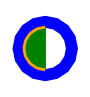

In [31]:
print('Confines Mask', bin_format(confines_def.mask))
print('Confines Value', bin_format(confines_def.value))

a, b = confines_example1()
relation_example(a, b, confines_def)

Relation Binary  111001001  |  111001001  |  001011101 
Relationship RelationshipType.CONFINES


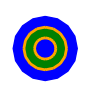

In [32]:
a, b = confines_example2()
relation_example(a, b, confines_def)

# Done To Here

<link rel="stylesheet" href="relations.css">
<table width="760px">
<tr class="l"><th>Overlaps</th><th>Symmetric</th></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> 
have some but not all points in common.
</td></tr>
<tr><td width=300>
<img src="Images/Relationships/overlaps simple.png" alt="Overlaps">
<img src="Images/Relationships/overlaps ring.png" alt="Overlaps With Ring">
<img src="Images/Relationships/overlaps surounded.png" alt="Overlaps Surrounded">
<img src="Images/Relationships/overlaps ring surrounds simple.png" alt="Ring Overlaps Simple">
<img src="Images/Relationships/archipelago contains simple.png" alt="Ring Overlaps Simple">
</td><td>
<table class="f">
<tr><th/><th>Hull</th><th>Exterior</th><th>Region</th></tr>
<tr><th>Matrix</th>
<td class="na">N/A</td>
<td class="na">N/A</td>
<td><table class="matrix">        
    <tr><td>2</td><td>*</td><td>2</td></tr>
    <tr><td>*</td><td>*</td><td>*</td></tr>
    <tr><td>2</td><td>*</td><td>*</td></tr>
    </table>
    </td>
</tr>
</tr><tr class="bin">
<th>Mask</th><td><span>000000000</span></td><td><span>000000000</span></td><td><span>101000100</span></td></tr>
<tr class="bin">
<th>Value</th><td><span>000000000</span></td><td><span>000000000</span></td><td><span>101000100</span></td></tr>
</table></td></tr></table>

In [39]:
overlaps_def = RelationshipTest(RelationshipType.OVERLAPS, 
                                0b000000000000000000101000100, 
                                0b000000000000000000101000100)

def overlaps_simple_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle6_offset = shapely.Polygon(circle_points(3, offset_x=2))
    box4_offset = shapely.Polygon(box_points(4, offset_x=2))

    a = StructureSlice([circle6])
    b = StructureSlice([circle6_offset])
    return a, b

def overlaps_ring_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle6_offset = shapely.Polygon(circle_points(3, offset_x=2.5))

    a = StructureSlice([circle6, circle4])
    b = StructureSlice([circle6_offset])
    return a, b

def overlaps_surrounded_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle2 = shapely.Polygon(circle_points(1.5, offset_x=1))

    a = StructureSlice([circle6, circle4])
    b = StructureSlice([circle2])
    return a, b

def overlaps_ring_surrounded_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle3 = shapely.Polygon(circle_points(1.5))
    circle4 = shapely.Polygon(circle_points(2))

    a = StructureSlice([circle6, circle3])
    b = StructureSlice([circle4])
    return a, b

def overlaps_archipelago_simple_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle2 = shapely.Polygon(circle_points(1))

    a = StructureSlice([circle6, circle4, circle2])
    b = StructureSlice([circle4])
    return a, b


Overlaps Mask  000000000  |  000000000  |  101000100 
Overlaps Value  000000000  |  000000000  |  101000100 
Relation Binary  111101111  |  111101111  |  111101111 
Relationship RelationshipType.OVERLAPS


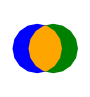

In [40]:
print('Overlaps Mask', bin_format(overlaps_def.mask))
print('Overlaps Value', bin_format(overlaps_def.value))

a, b = overlaps_simple_example()
relation_example(a, b, overlaps_def)

Relation Binary  111101111  |  111101111  |  111101111 
Relationship RelationshipType.OVERLAPS


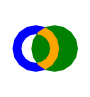

In [41]:
a, b = overlaps_ring_example()
relation_example(a, b, overlaps_def)

Relation Binary  111001001  |  111001001  |  111101111 
Relationship RelationshipType.OVERLAPS


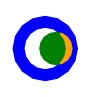

In [42]:
a, b = overlaps_surrounded_example()
relation_example(a, b, overlaps_def)

Relation Binary  111001001  |  111001001  |  111101101 
Relationship RelationshipType.OVERLAPS


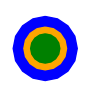

In [43]:
a, b = overlaps_ring_surrounded_example()
relation_example(a, b, overlaps_def)

Relation Binary  111001001  |  111001001  |  101111101 
Relationship RelationshipType.OVERLAPS


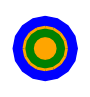

In [44]:
a, b = overlaps_archipelago_simple_example()
relation_example(a, b, overlaps_def)

### Relationship Test Definitions

In [ ]:
def identify_type(relation_binary) -> RelationshipType:
    '''Applies a collection of definitions for named relationships to a supplied
    relationship binary.

    The defined relationships are:
        Relationship      Region Test   Exterior Test   Hull Test
        Disjoint          FF*FF****     FF*FF****       FF*FF****
        Shelters          FF*FF****     FF*FF****       T***F*F**
        Surrounds         FF*FF****     T***F*F**
        Confines          FF*FT****     T***T****
        Borders           FF*FT****     FF*FT****
        Contains	      T*T*F*FF*
        Incorporates	  T*T*T*FF*
        Equals	          T*F**FFF*
        Overlaps          TTTT*TTT*

    Args:
        relation_binary (int): An integer generated from the combined DE-9IM
            tests.

    Returns:
        RelationshipType: The identified RelationshipType if one of the tests
            passes, otherwise RelationshipType.UNKNOWN.
    '''
    # Relationship Test Definitions
    test_binaries = [
        RelationshipTest(RelationshipType.OVERLAPS,
            0b000000000000000000111101110,
            0b000000000000000000111101110),
        RelationshipTest(RelationshipType.EQUALS,
            0b000000000000000000101001110,
            0b000000000000000000100000000),
        RelationshipTest(RelationshipType.INCORPORATES,
            0b000000000000000000101010110,
            0b000000000000000000101010000),
        RelationshipTest(RelationshipType.CONTAINS,
            0b000000000000000000101010110,
            0b000000000000000000101000000),
        RelationshipTest(RelationshipType.CONFINES,
            0b000000000101010110110110000,
            0b000000000101000000000010000),
        RelationshipTest(RelationshipType.BORDERS,
            0b000000000110110000110110000,
            0b000000000000010000000010000),
        RelationshipTest(RelationshipType.SHELTERS,
            0b100010100110110000110110000,
            0b000000000000000000100000000),
        RelationshipTest(RelationshipType.SURROUNDS,
            0b000000000100010110110110000,
            0b000000000100000000000000000),
        RelationshipTest(RelationshipType.DISJOINT,
            0b110110000110110000110110000,
            0b000000000000000000000000000)
        ]
    for rel_def in test_binaries:
        result = rel_def.test(relation_binary)
        if result:
            return result
    return RelationshipType.UNKNOWN



#### Testing identify_type function

### Contains

In [ ]:
box6 = shapely.Polygon(box_points(6))
box4 = shapely.Polygon(box_points(4))
a = StructureSlice([box6])
b = StructureSlice([box4])
print(identify_type(relate(a,b)))

### Equals

In [ ]:
box6 = shapely.Polygon(box_points(6))
a = StructureSlice([box6])
print(identify_type(relate(a,a)))

### Disjoint

In [ ]:
# 2 2x2 boxes
box2a = shapely.Polygon(box_points(2, offset_x=-3))
box2b = shapely.Polygon(box_points(2, offset_x=3))
a = StructureSlice([box2a])
b = StructureSlice([box2b])
print(identify_type(relate(a,b)))

### Missing Polygon

In [ ]:
box6 = shapely.Polygon(box_points(6))
box0 = shapely.Polygon()
a = StructureSlice([box6])
b = StructureSlice([box0])
print(identify_type(relate(a,b)))

## Reference binaries

In [ ]:
tmissing_other = 0b001001001
missing_primary = 0b000000111

contains_mask = 0b101010110
contains_value = 0b101000000

within_mask = 0b101011100
within_value = 0b100000100


### Contains

In [ ]:
box6 = Polygon(box_points(6))
box4 = Polygon(box_points(4))

contains = shapely.relate(box6, box4)
print(contains)

# Make binary
contains_str = contains.replace('F','0').replace('2','1')
contains_bin = int(contains_str, base=2)

# Slices with box6 but not box4
combined_bin = contains_bin | missing_other
print(bin(combined_bin))

# OR of slices
print(bin(combined_bin & contains_mask))
print('Contains:', (combined_bin & contains_mask) == contains_value)

shapely.union(box6.boundary, box4.boundary)

### Within

In [ ]:
within =shapely.relate(box4, box6)
print(within)


# Make binary
within_str = within.replace('F','0').replace('2','1')
within_bin = int(within_str, base=2)

# Slices with box6 but not box4
combined_bin = within_bin | missing_primary
print(bin(combined_bin))

# OR of slices
print(bin(combined_bin & within_mask))
print('Within:', (combined_bin & within_mask) == within_value)

shapely.union(box6.boundary, box4.boundary)

### Equals

In [ ]:
box6 = Polygon(box_points(6))
box4 = Polygon(box_points(4))
hollow_box = shapely.difference(box6, box4)
print(shapely.relate(hollow_box, hollow_box))
hollow_box

In [ ]:
fig = plt.figure(1, figsize=(2,1))
ax = fig.add_subplot(121)
ax.set_axis_off()
ax.axis('equal')
p = plot_polygon(hollow_box, ax=ax, add_points=True, color='red')

### Simple overlap

In [ ]:
box6 = Polygon(box_points(6))
offset_box6 = Polygon(box_points(6,offset_x=3))
print(shapely.relate(box6, offset_box6))

shapely.union(box6.boundary, offset_box6.boundary)

In [ ]:
circle_6 = Polygon(circle_points(6))
offset_circle_6 = Polygon(circle_points(6,offset_x=3))
print(shapely.relate(circle_6, offset_circle_6))

shapely.union(circle_6.boundary, offset_circle_6.boundary)

- *2121**1**1212* 
- > ***1*** because the boundaries overlap
- *2121**0**1212* 
- > ***0*** because the boundaries only cross

### Borders 

#### Borders Exterior 

In [ ]:
box6_right = Polygon(box_points(6, offset_x=6))
box4_right = Polygon(box_points(4, offset_x=6))
hollow_box_right = shapely.difference(box6_right, box4_right)
#hollow_box_right

In [ ]:
box4_inside = Polygon(box_points(2, 3.5, offset_x=-1))
box2_inside = Polygon(box_points(1, 3, offset_x=-1))
hollow_box_inside = shapely.difference(box4_inside, box2_inside)
#hollow_box_inside

In [ ]:
shapely.relate(hollow_box, hollow_box_right)
shapely.union(hollow_box.boundary, hollow_box_right.boundary)

In [ ]:
shape = Polygon(hollow_box.exterior)
print(shapely.relate(shape, hollow_box_right))
shapely.union(hollow_box.exterior, hollow_box_right)


In [ ]:
shape = Polygon(hollow_box.interiors[0])
print(shapely.relate(shape, hollow_box_right))
shapely.union(hollow_box.interiors[0], hollow_box_right)


#### Borders Interior 

In [ ]:
shape = Polygon(hollow_box.interiors[0])
print(shapely.relate(shape, hollow_box_inside))


In [ ]:
print(shapely.relate(shapely.Polygon(shapely.get_exterior_ring(hollow_box)),
                     hollow_box_inside))
shapely.union(hollow_box, hollow_box_inside.boundary)


In [ ]:
shapely.get_exterior_ring(poly)

#### Filled Interior

In [ ]:
circle_6 = Polygon(circle_points(6))
circle_4 = Polygon(circle_points(4))
circle_2 = Polygon(circle_points(2))
island_shape = shapely.union(shapely.difference(circle_6, circle_4),circle_2)
island_border = shapely.difference(circle_4, circle_2)

print(shapely.relate(island_shape, island_border))

interior = Polygon(island_shape.geoms[0].interiors[0])
print(shapely.relate(interior, island_border))
shapely.union(island_shape.boundary, island_border.boundary)

In [ ]:
circle_6 = Polygon(circle_points(6))
circle_4 = Polygon(circle_points(4))
circle_2 = Polygon(circle_points(2))
island = shapely.union(shapely.difference(circle_6, circle_4),circle_2)
island

In [ ]:
offset_circle_6 = Polygon(circle_points(6,offset_x=6))
offset_circle_4 = Polygon(circle_points(4,offset_x=6))
offset_circle_2 = Polygon(circle_points(2,offset_x=6))
offset_island = shapely.union(shapely.difference(offset_circle_6, offset_circle_4),offset_circle_2)


In [ ]:
shapely.difference(island, offset_island)

In [ ]:
shapely.union(island, offset_island)

In [ ]:
offset_island.boundary

In [ ]:
a = [g for g in offset_island.geoms]
a[0]

In [ ]:
a[1]

In [ ]:
island

In [ ]:
circle_35 = Polygon(circle_points(3.5))
circle_25 = Polygon(circle_points(2.5))
hollow = shapely.difference(circle_35, circle_25)
hollow

In [ ]:
print(shapely.relate(island, hollow))
shapely.union(island, hollow)

In [ ]:
shape = Polygon(island.geoms[0].exterior)
print(shapely.relate(shape, hollow))
shapely.union(island.geoms[0].exterior, hollow)


In [ ]:
shape = Polygon(island.geoms[0].interiors[0])
print(shapely.relate(shape, hollow))
shapely.union(island.geoms[0].interiors[0], hollow)


In [ ]:
shape = Polygon(island.geoms[1])
print(shapely.relate(shape, hollow))
shapely.union(island.geoms[1], hollow)


# Read Structure with Islands from DICOM


### File Paths

In [ ]:
base_path = Path.cwd()
data_path = base_path / 'Test Data'
dicom_path = data_path / r'StructureVolumeTests\SingleContours'

In [ ]:
structure_names_file = dicom_path / 'RS.GJS_Struct_Tests.Islands.dcm'

In [ ]:
RS_DICOM_Utilities.get_structure_file_info(structure_names_file)

In [ ]:
dataset = pydicom.dcmread(structure_names_file)

In [ ]:
roi_id = RS_DICOM_Utilities.get_names_nums(dataset)
roi_id

In [ ]:
a = [roi for roi in dataset.ROIContourSequence]

In [ ]:
roi = a[2]
structure_num = roi.ReferencedROINumber
hasattr(roi, 'ContourSequence')

In [ ]:
contours = []
holes = []
for contour_points in roi.ContourSequence:
    points = np.array(contour_points.ContourData).reshape(-1,3)
    points = points / 10  # Convert from mm to cm
    contour = Polygon(points)
    if contour.exterior.is_ccw:
        contours.append(contour)
    else:
        holes.append(contour)

1. sort holes & contours by decreasing area
2. Create polygon from largest contour
3. if next largest is contour and is not contained in polygon combine it otherwise postpone it
4. if next largest is hole and is contained in polygon subtract it otherwise postpone it
5. repeat for all holes & contours, revisiting postponed holes & contours.

In [ ]:
shapely.union_all(contours)


In [ ]:
contour_points = b[3]
points = np.array(contour_points.ContourData).reshape(-1,3)
points = points / 10  # Convert from mm to cm
contour = Polygon(points)
contour.exterior.is_ccw